<a href="https://colab.research.google.com/github/CreatlV/Deep-Learning-DD2424/blob/main/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation Example


## Packages


In [2]:
!pip install elasticdeform

     |████████████████████████████████| 93 kB 2.3 MB/s eta 0:00:011


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from elasticdeform import deform_random_grid
import cv2
import os
from PIL import Image
import pandas as pd

2021-09-01 18:20:06.737660: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0


## Dataset

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# !unzip "PhC-C2DH-U373-train-20210829T172421Z-001.zip"

In [5]:
# %cd /
%ls
image_directory = 'PhC-C2DH-U373-train/01'
seg_directory = 'PhC-C2DH-U373-train/01_ST/SEG'

'DataAugmentation(1).ipynb'                     augmented.zip
'ExampleMitochondria(1).ipynb'                  src/
 PhC-C2DH-U373-train/                           tutorials/
 PhC-C2DH-U373-train-20210829T172421Z-001.zip


In [6]:
SIZE = 256
image_dataset =[]
seg_dataset = []


## Alla bilder har inte segmenteringar i GT, finns fler i ST

images = sorted(os.listdir(seg_directory))


for i, img_name in enumerate(images):
  if (img_name.split('.')[1] == 'tif'):

    image = cv2.imread(os.path.join(seg_directory, img_name), cv2.IMREAD_UNCHANGED)
    image = (image.astype(np.float)-image.min())*255.0 / (image.max()-image.min())
    image = image.astype(np.uint8)

    # print(np.nonzero(image))
    image = Image.fromarray(image)
    seg_dataset.append(image)

print(images)
  
images = sorted(os.listdir(image_directory))


for i, img_name in enumerate(images):
  image = cv2.imread(os.path.join(image_directory, img_name), cv2.IMREAD_UNCHANGED)
  # print(image)
  # print(image)
  # print(image.astype(float))
  image = Image.fromarray(image, 'L')
  image_dataset.append(image)

print(images)

['man_seg000.tif', 'man_seg001.tif', 'man_seg002.tif', 'man_seg003.tif', 'man_seg004.tif', 'man_seg005.tif', 'man_seg006.tif', 'man_seg007.tif', 'man_seg008.tif', 'man_seg009.tif', 'man_seg010.tif', 'man_seg011.tif', 'man_seg012.tif', 'man_seg013.tif', 'man_seg014.tif', 'man_seg015.tif', 'man_seg016.tif', 'man_seg017.tif', 'man_seg018.tif', 'man_seg019.tif', 'man_seg020.tif', 'man_seg021.tif', 'man_seg022.tif', 'man_seg023.tif', 'man_seg024.tif', 'man_seg025.tif', 'man_seg026.tif', 'man_seg027.tif', 'man_seg028.tif', 'man_seg029.tif', 'man_seg030.tif', 'man_seg031.tif', 'man_seg032.tif', 'man_seg033.tif', 'man_seg034.tif', 'man_seg035.tif', 'man_seg036.tif', 'man_seg037.tif', 'man_seg038.tif', 'man_seg039.tif', 'man_seg040.tif', 'man_seg041.tif', 'man_seg042.tif', 'man_seg043.tif', 'man_seg044.tif', 'man_seg045.tif', 'man_seg046.tif', 'man_seg047.tif', 'man_seg048.tif', 'man_seg049.tif', 'man_seg050.tif', 'man_seg051.tif', 'man_seg052.tif', 'man_seg053.tif', 'man_seg054.tif', 'man_seg0

43


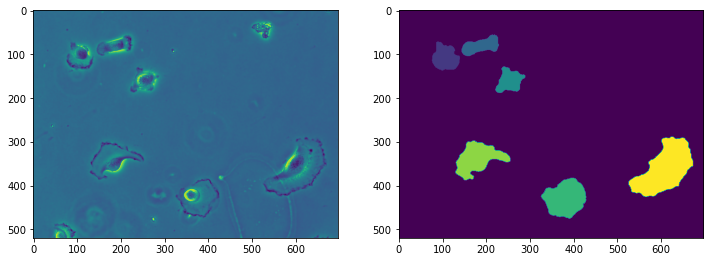

<PIL.Image.Image image mode=L size=696x520 at 0x7F4DFEFACD10>
<PIL.Image.Image image mode=L size=696x520 at 0x7F4DFEFB26D0>


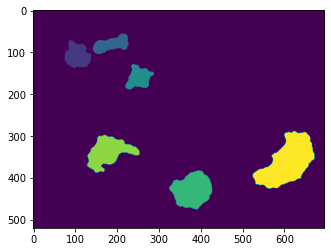

In [7]:
import random
import numpy as np
image_number = random.randint(0, len(images))
print(image_number)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(seg_dataset[image_number])
plt.show()

plt.imshow(image_dataset[image_number])
plt.imshow(seg_dataset[image_number])

print(image_dataset[image_number])
print(seg_dataset[image_number])


In [8]:
%cd '~/augmented_data_U373'

/home/jupyter/augmented_data_U373


In [9]:
deformed_images = []
deformed_seg = []

## UNCOMMENT FOR TRAIN DATA UPDATe
# %cd /content/drive/My\ Drive/Deep_Learning_Project/augmented_data_U373/

## UNCOMMENT FOR TEST DATA UPDATE
# %cd /content/drive/My\ Drive/Deep_Learning_Project/augmented_data_U373_test/

for image_index in range(100):
    for aug_index in range(100):
        randomZoom = random.randint(80, 150)
        randomRotate = random.randint(0, 360)
        [image_deformed, seg_deformed] = deform_random_grid([np.array(image_dataset[image_index]), np.array(seg_dataset[image_index])], sigma=10, points=3, rotate=randomRotate, zoom=randomZoom/100)
        seg_deformed[seg_deformed > 0] = 255
        deformed_images.append(image_deformed)
        deformed_seg.append(seg_deformed)
        image_deformed = Image.fromarray(image_deformed)
        seg_deformed = Image.fromarray(seg_deformed)

        seg_deformed.save("Y_labels/Y_image_" + str(image_index) + "_" + str(aug_index) + ".tif")
        image_deformed.save("X_labels/X_image_" + str(image_index) + "_" +  str(aug_index) + ".tif")

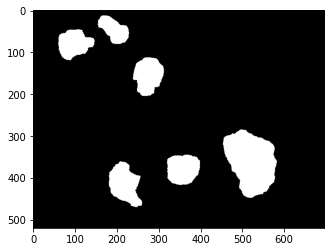

In [ ]:
nr = 10
# plt.imshow(deformed_images[nr], cmap='gray')
# deformed_seg[nr][deformed_seg[nr] > 0] = 255
plt.imshow(deformed_seg[nr], cmap='gray', alpha=1)

In [ ]:
plt.imshow(seg_deformed, cmap='jet')

In [ ]:
plt.imshow(seg_dataset[1], cmap='jet')

In [ ]:
plt.imshow(image_dataset[1],cmap='gray')
plt.imshow(seg_dataset[1], cmap='jet', alpha=0.5)

In [ ]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

In [ ]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))

print(image.shape)

grayscaled = tf.image.rgb_to_grayscale(image)

print(grayscaled.shape)

sGrayscaled = tf.squeeze(grayscaled) 

print(sGrayscaled.shape)

plt.imshow(sGrayscaled)
# _ = plt.imshow(grayscaled)
# _ = plt.title(get_label_name(label))
